항공사 지연 요인 분석 보고서

# 1. 프로젝트 개요

분석 목적: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시

데이터 출처: 항공 운항 지연률 데이터 (총 33,468건)

분석 대상 변수:

pct_carrier_delay: 운항사 요인

pct_atc_delay: 관제 요인

pct_weather_delay: 기상 요인

airline: 항공사명

In [166]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("data/airline_stats (3).csv")  # 파일명은 상황에 맞게 수정
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [172]:
# 데이터 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [168]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


# 2. 데이터 전처리

2.1 결측치 탐색

결측치가 있는 변수: pct_carrier_delay, pct_atc_delay, pct_weather_delay (각 28건)

2.2 결측치 처리

방안 A: 행 제거 (dropna)

방안 B: 평균으로 대체 (fillna)

방안 C: 항공사별 평균으로 대체 (groupby().transform())

세 가지 방식의 처리 후 분포 비교 및 통계 요약 포함

In [169]:
# 데이터 전처리
col = ['pct_carrier_delay','pct_atc_delay','pct_weather_delay']

# 결측치가 있는 부분은 전부 없애기
df_dropna = df.dropna(axis=0) 

# 각 컬럼 당 평균을 결측치에 대치
df_fillna = df.copy()
for i in col:
    df_fillna[i] = df_fillna[i].fillna(df_fillna[i].mean())

# 항공사별 각 컬럼의 평균을 결측값으로 대치
df_transform = df.copy()
for i in col:
    df_transform[i] = df_transform[i].fillna(df_transform.groupby('airline')[i].transform('mean'))

In [170]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [171]:
df_dropna.info()
print("="*50)
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33468 non-null  float64
 1   pct_atc_delay      33468 non-null  float64
 2   pct_weather_delay  33468 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [118]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33468 non-null  float64
 1   pct_atc_delay      33468 non-null  float64
 2   pct_weather_delay  33468 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [119]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [120]:
# 데이터 분포 확인
df_dropna.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [121]:
df_fillna.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33468.000000,33468.000000,33468.000000
mean,7.041475,5.089962,0.684776
std,4.495714,4.716672,1.073294
min,0.000000,0.000000,0.000000
25%,4.147084,2.148281,0.000000
50%,6.359631,3.903367,0.316655
75%,9.136141,6.625000,0.934579
max,100.000000,100.000000,33.333333


In [122]:
df_transform.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33468.000000,33468.000000,33468.000000
mean,7.041531,5.090018,0.684786
std,4.495773,4.716727,1.073301
min,0.000000,0.000000,0.000000
25%,4.147084,2.148281,0.000000
50%,6.357260,3.903367,0.316655
75%,9.136141,6.626106,0.934579
max,100.000000,100.000000,33.333333


C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\2709062888.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\2709062888.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\2709062888.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\2709062888.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

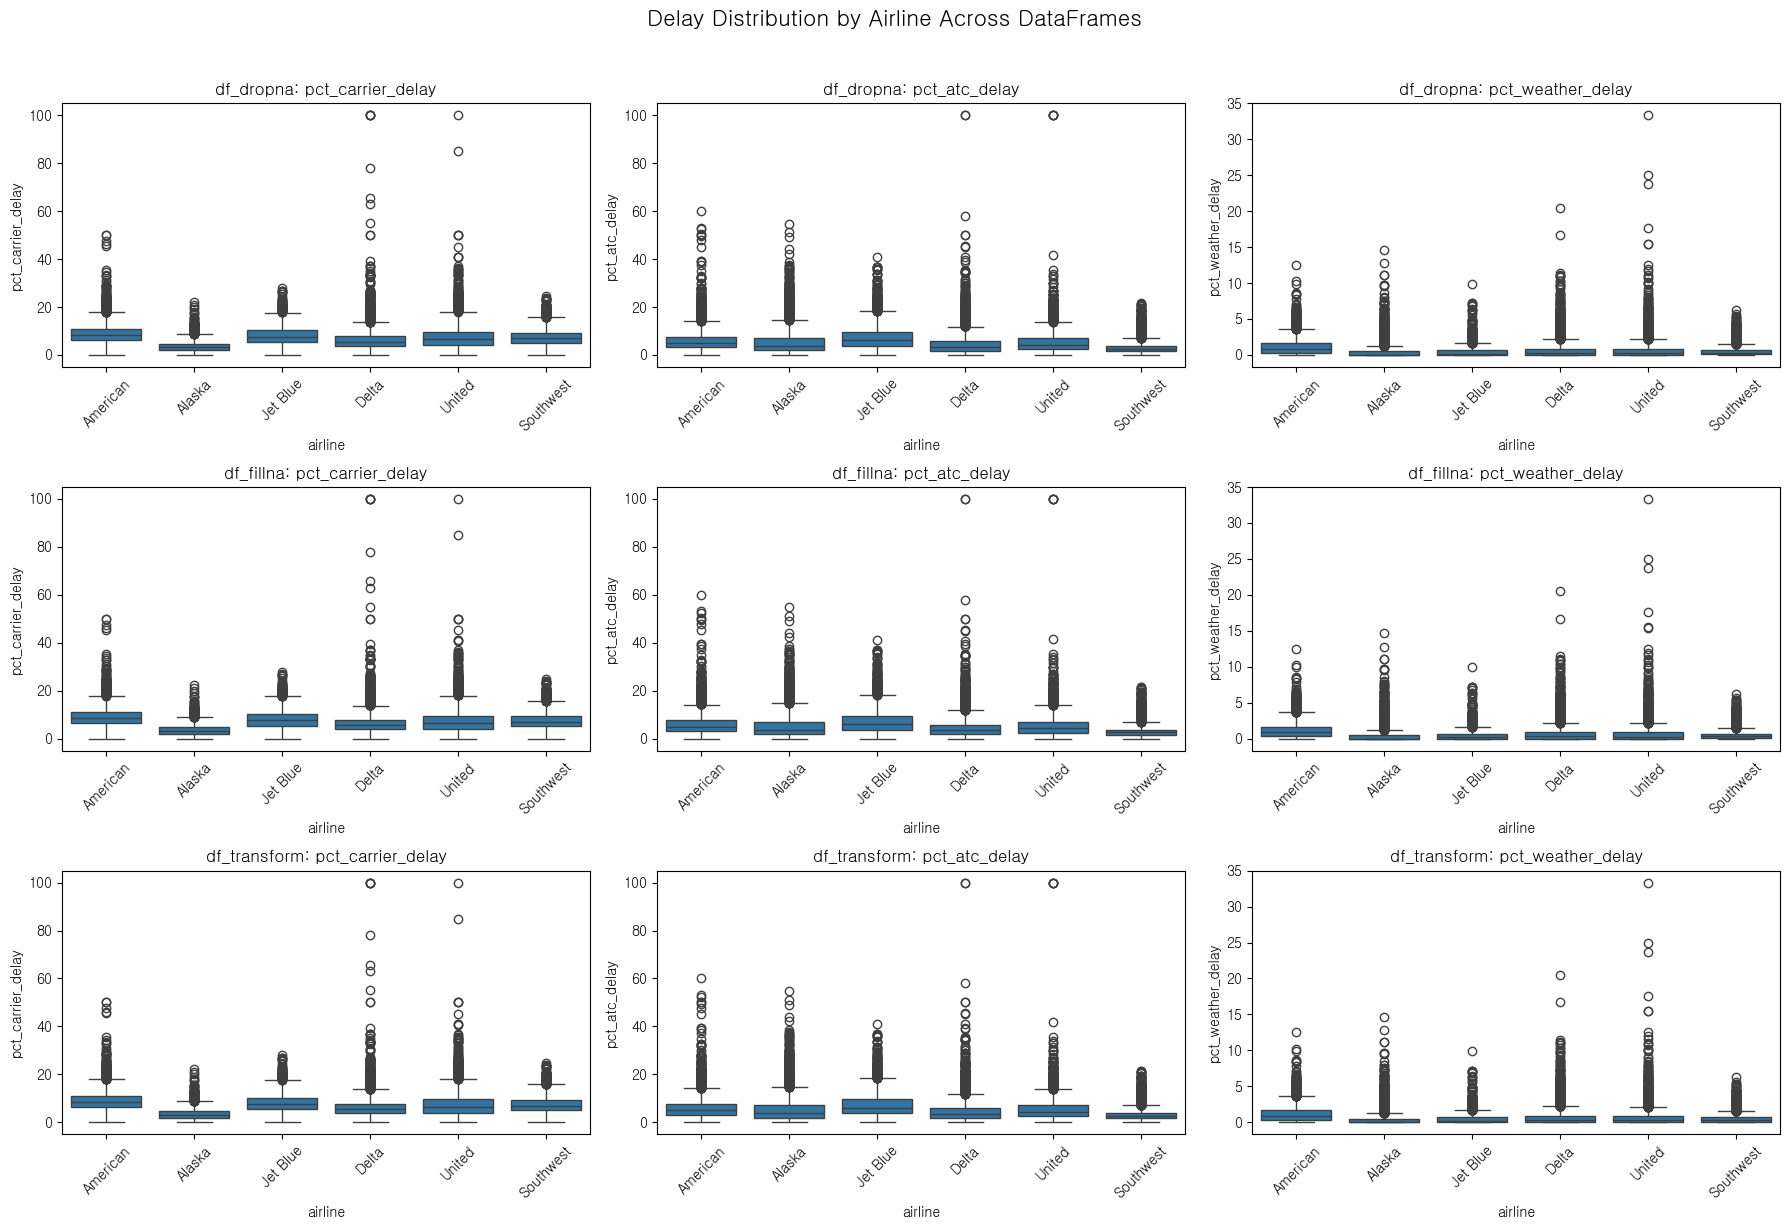

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

col = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
dfs = {'df_dropna': df_dropna, 'df_fillna': df_fillna, 'df_transform': df_transform}

fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharex=False)
fig.suptitle('Delay Distribution by Airline Across DataFrames', fontsize=16, y=1.02)

for row_idx, (df_name, df) in enumerate(dfs.items()):
    for col_idx, col_name in enumerate(col):
        ax = axes[row_idx, col_idx]
        sns.boxplot(data=df, x='airline', y=col_name, ax=ax)
        ax.set_title(f'{df_name}: {col_name}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3714397073.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3714397073.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3714397073.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3714397073.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

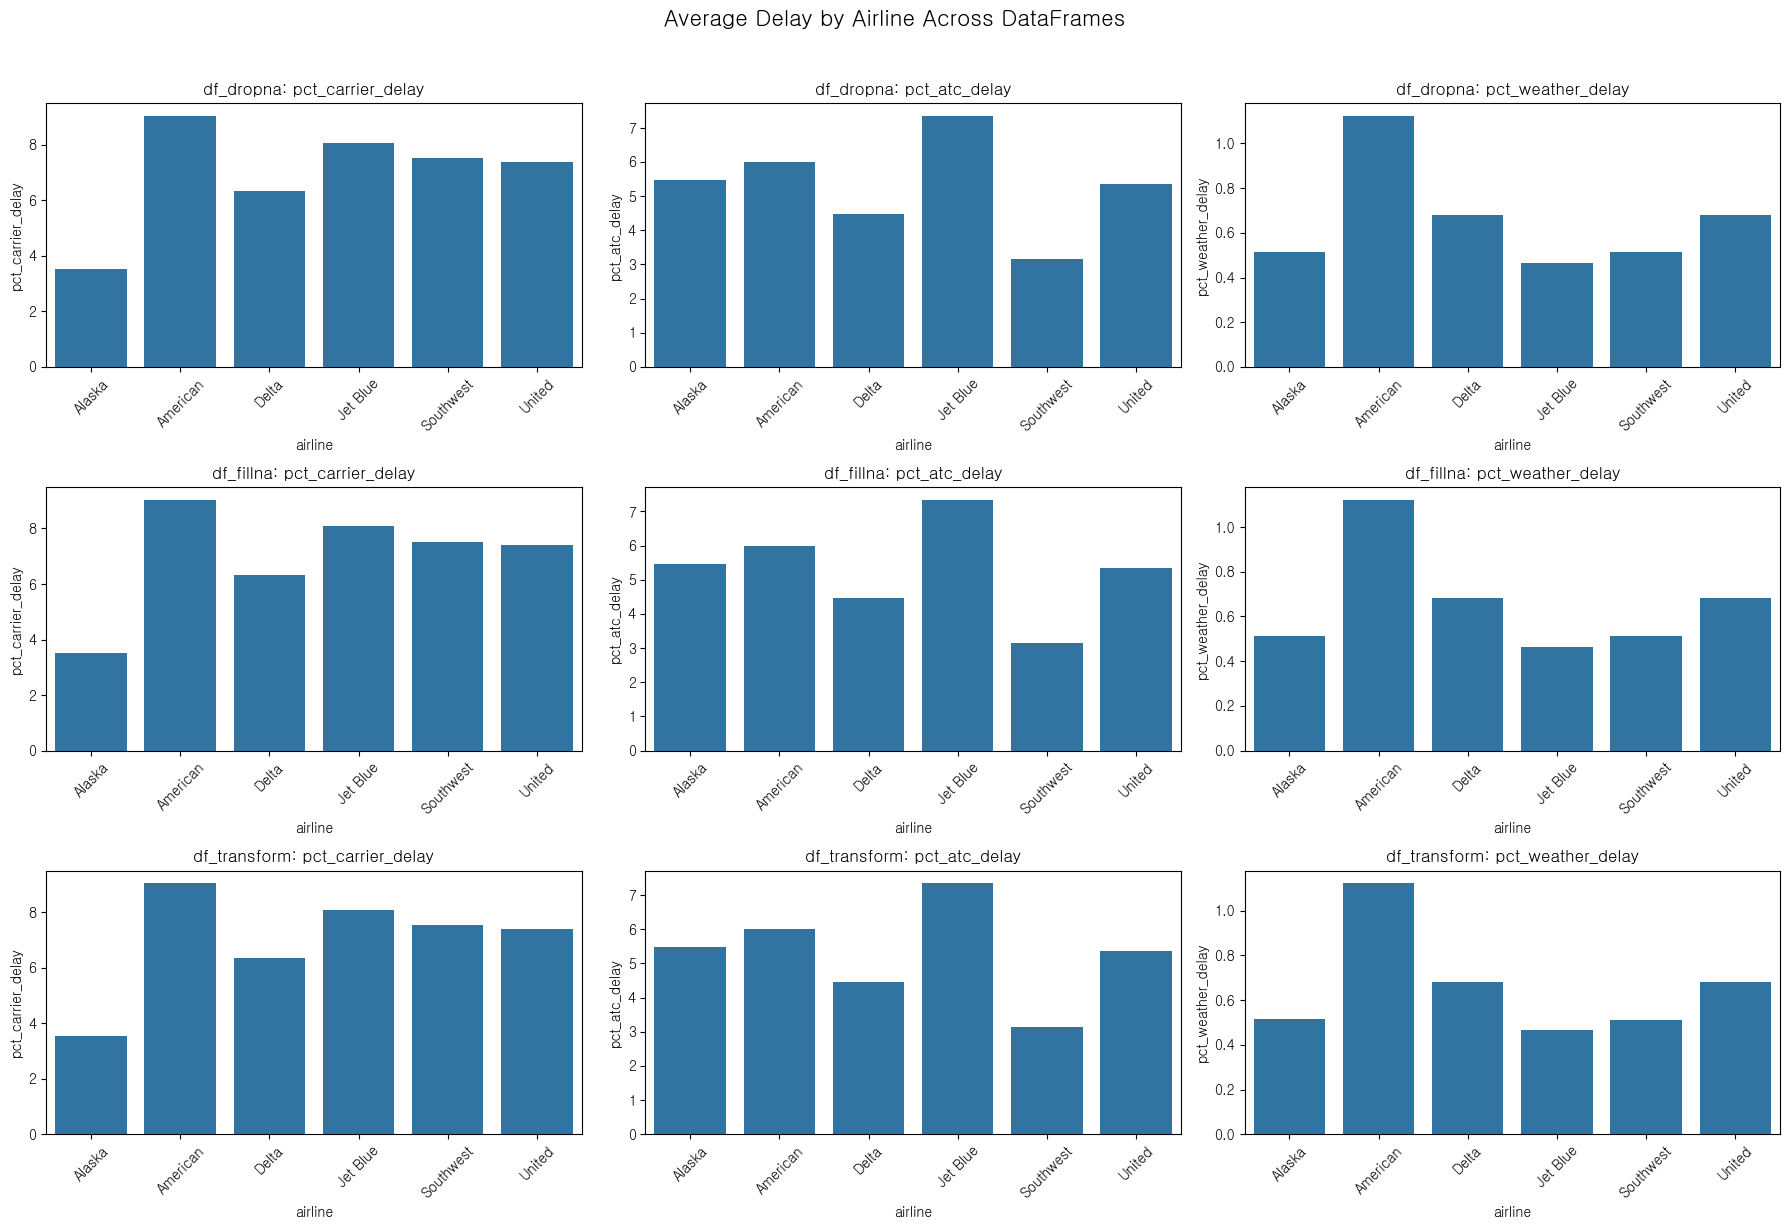

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

dfs = {'df_dropna': df_dropna, 'df_fillna': df_fillna, 'df_transform': df_transform}

fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharex=False)
fig.suptitle('Average Delay by Airline Across DataFrames', fontsize=16, y=1.02)

for row_idx, (df_name, df) in enumerate(dfs.items()):
    for col_idx, col_name in enumerate(col):
        ax = axes[row_idx, col_idx]
        # 항공사별 평균 계산
        data_mean = df.groupby('airline')[col_name].mean().reset_index()
        sns.barplot(data=data_mean, x='airline', y=col_name, ax=ax)
        ax.set_title(f'{df_name}: {col_name}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df.groupby('airline').mean()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.521889,5.472672,0.513497
American,9.042180,5.993529,1.122920
Delta,6.333460,4.462978,0.680765
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697


해석: 3개의 케이스의 요약치가 비슷하여 항공사별 평균을 살펴보았는데, 항공사 별로의 편차는 심한 듯 하여
항공사 별로의 칼럼의 평균 케이스3번을 활용하여 데이터분석을 진행하겠다.

# 3. 탐색적 데이터 분석 (EDA)

3.1 변수별 분포

히스토그램 및 상자그림(boxplot) 시각화

이상치(outlier) 여부 확인

3.2 항공사별 비교

항공사별 평균 지연율 비교 (막대그래프)

항공사별 상자그림 비교

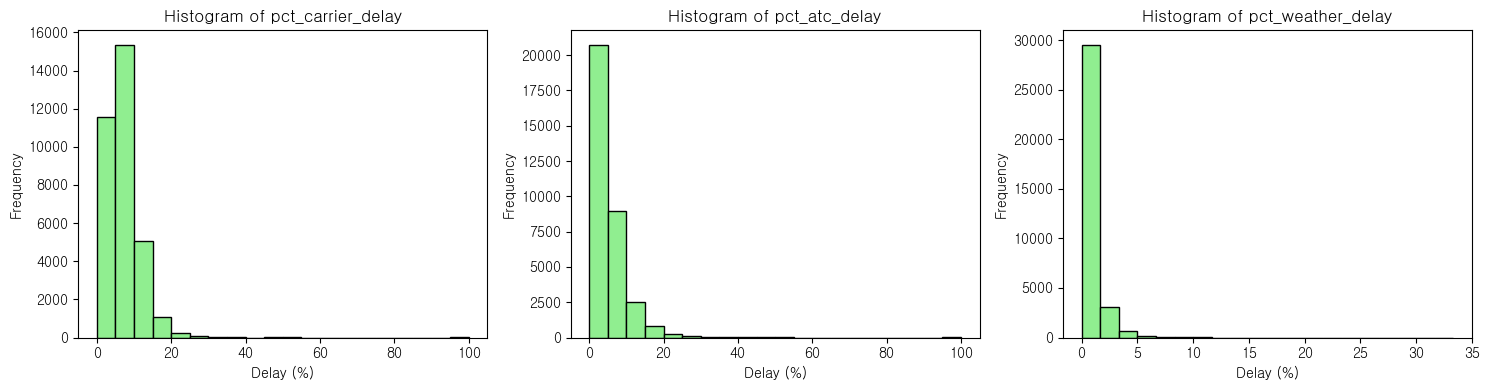

In [157]:
# 변수별 분포

import matplotlib.pyplot as plt

col = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

plt.figure(figsize=(15, 4))

for i, c in enumerate(col):
    plt.subplot(1, 3, i+1)
    plt.hist(df_transform[c].dropna(), bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram of {c}')
    plt.xlabel('Delay (%)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

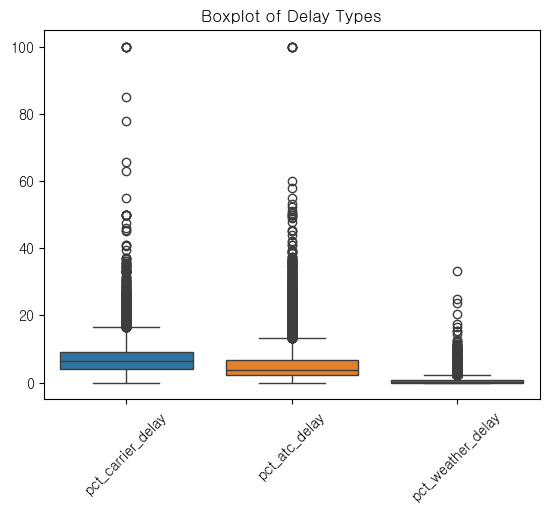

In [158]:
col = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

sns.boxplot(data=df_transform[col])
plt.title('Boxplot of Delay Types')
plt.xticks(rotation=45)
plt.show()

In [159]:
cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f"{col} 이상치 개수: {outlier_count}")

pct_carrier_delay 이상치 개수: 966
pct_atc_delay 이상치 개수: 1787
pct_weather_delay 이상치 개수: 2184


C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3466314968.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3466314968.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a2.set_xticklabels(a2.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3466314968.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a3.set_xticklabels(a3.get_xticklabels(), rotation=45)


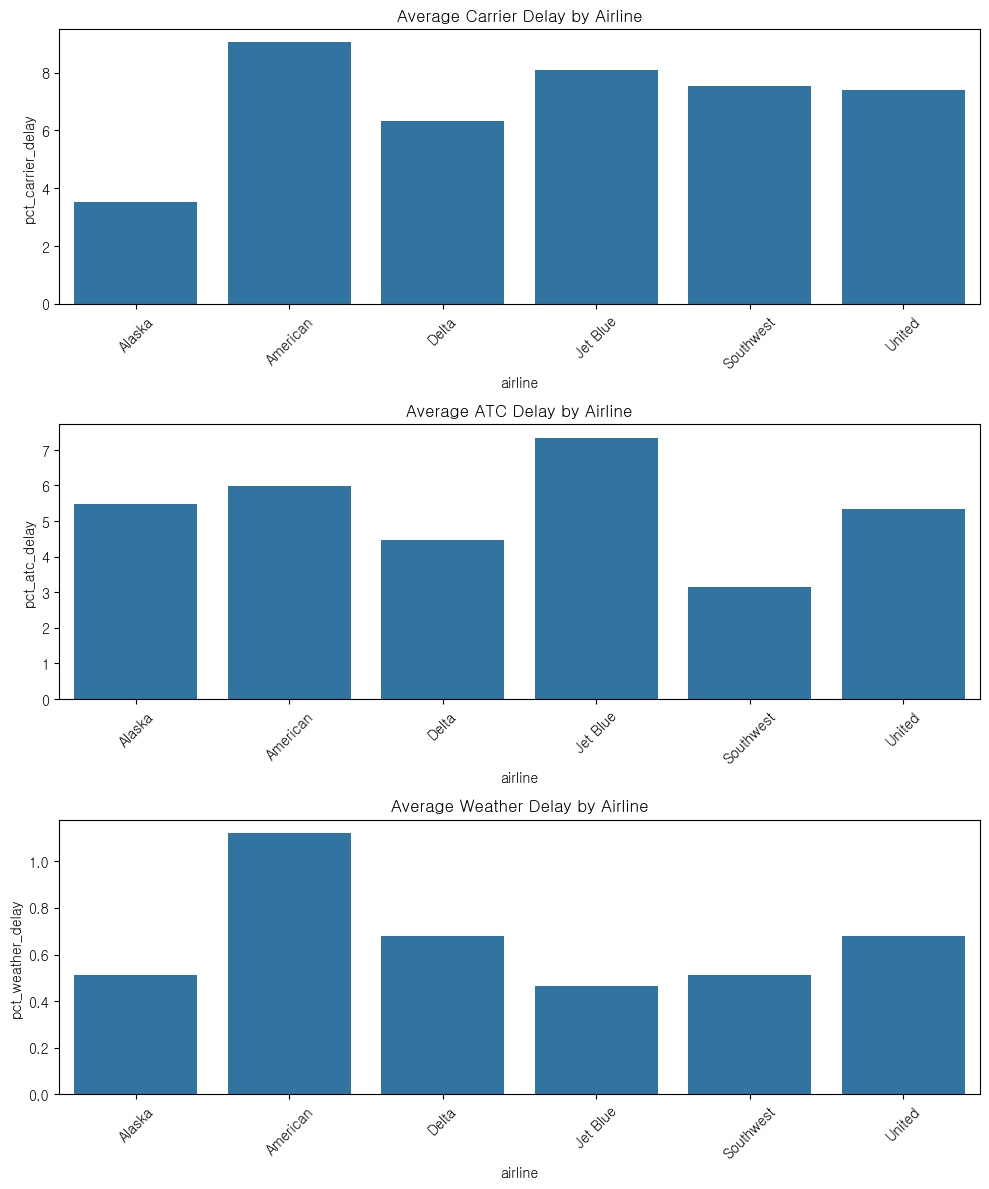

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 12))
a1 = fig.add_subplot(3, 1, 1)
a2 = fig.add_subplot(3, 1, 2)
a3 = fig.add_subplot(3, 1, 3)

# 1. 항공사별 평균 carrier delay
carrier_mean = df_transform.groupby('airline')['pct_carrier_delay'].mean().reset_index()
sns.barplot(data=carrier_mean, x='airline', y='pct_carrier_delay', ax=a1)
a1.set_title('Average Carrier Delay by Airline')
a1.set_xticklabels(a1.get_xticklabels(), rotation=45)

# 2. 항공사별 평균 ATC delay
atc_mean = df_transform.groupby('airline')['pct_atc_delay'].mean().reset_index()
sns.barplot(data=atc_mean, x='airline', y='pct_atc_delay', ax=a2)
a2.set_title('Average ATC Delay by Airline')
a2.set_xticklabels(a2.get_xticklabels(), rotation=45)

# 3. 항공사별 평균 Weather delay
weather_mean = df_transform.groupby('airline')['pct_weather_delay'].mean().reset_index()
sns.barplot(data=weather_mean, x='airline', y='pct_weather_delay', ax=a3)
a3.set_title('Average Weather Delay by Airline')
a3.set_xticklabels(a3.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\1641992336.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\1641992336.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a2.set_xticklabels(a2.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\1641992336.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a3.set_xticklabels(a3.get_xticklabels(), rotation=45)


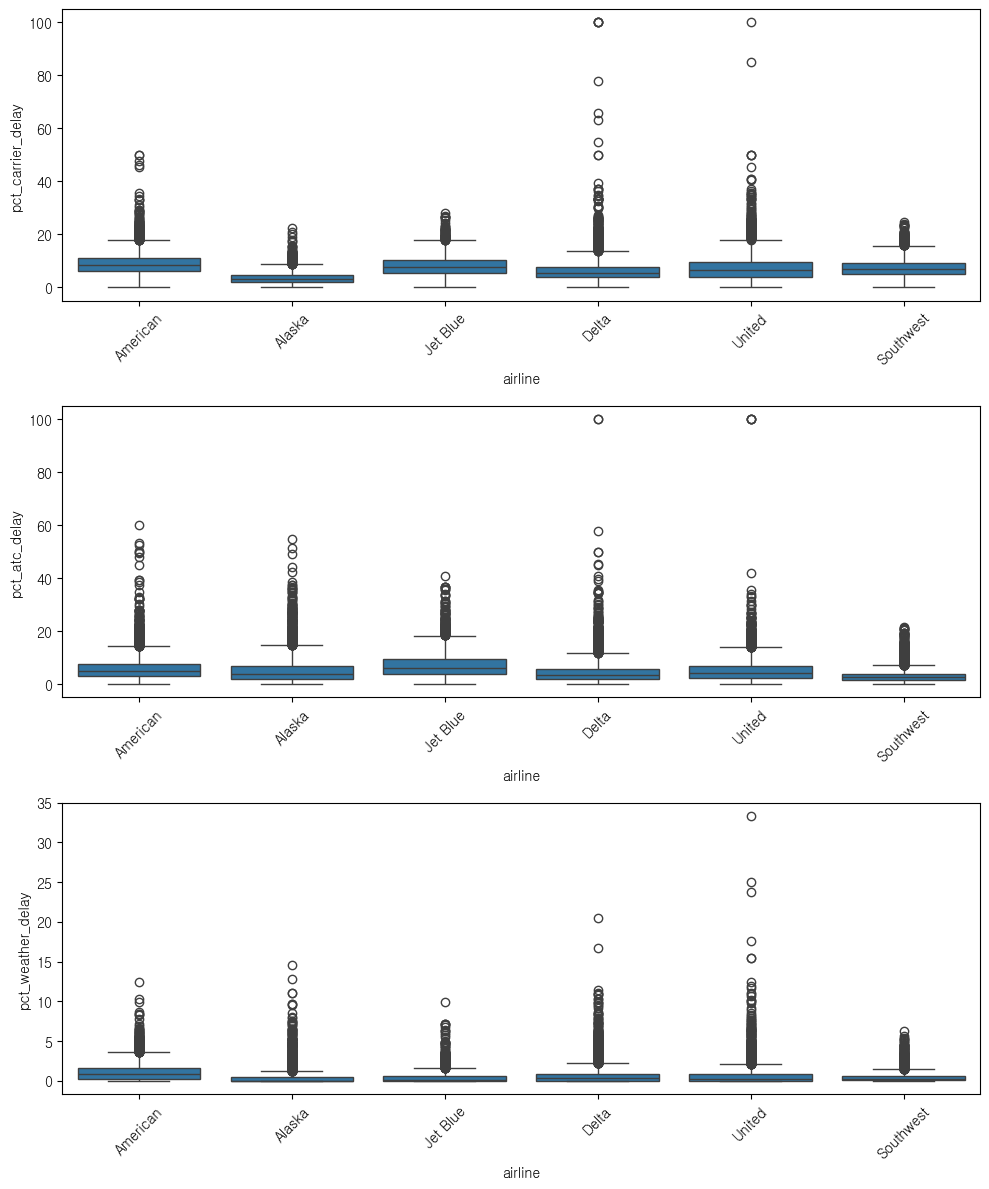

In [154]:
# 상자그림으로 이상치 확인

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 12))
a1 = fig.add_subplot(3,1,1)
a2 = fig.add_subplot(3,1,2)
a3 = fig.add_subplot(3,1,3)

sns.boxplot(data=df_transform, x='airline', y='pct_carrier_delay', ax=a1)
a1.set_xticklabels(a1.get_xticklabels(), rotation=45)

sns.boxplot(data=df_transform, x='airline', y='pct_atc_delay', ax=a2)
a2.set_xticklabels(a2.get_xticklabels(), rotation=45)

sns.boxplot(data=df_transform, x='airline', y='pct_weather_delay', ax=a3)
a3.set_xticklabels(a3.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
airlines = df_transform['airline'].unique()

for col in cols:
    print(f"\n[{col}] 이상치 개수 (항공사별)")
    for airline in airlines:
        subset = df_transform[df_transform['airline'] == airline][col].dropna()
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = ((subset < lower) | (subset > upper)).sum()
        print(f"{airline}: {outlier_count}")


[pct_carrier_delay] 이상치 개수 (항공사별)
American: 181
Alaska: 138
Jet Blue: 61
Delta: 438
United: 202
Southwest: 133

[pct_atc_delay] 이상치 개수 (항공사별)
American: 286
Alaska: 258
Jet Blue: 145
Delta: 457
United: 244
Southwest: 332

[pct_weather_delay] 이상치 개수 (항공사별)
American: 179
Alaska: 553
Jet Blue: 227
Delta: 664
United: 398
Southwest: 391


In [162]:
df_transform['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [163]:
import pandas as pd

col = 'pct_carrier_delay'  # 분석 대상 컬럼
airlines = df['airline'].unique()

outlier_stats = []

for airline in airlines:
    # 해당 항공사의 데이터 추출
    subset = df[df['airline'] == airline][col].dropna()
    total_count = len(subset)
    
    # IQR 계산
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 개수
    outlier_count = ((subset < lower_bound) | (subset > upper_bound)).sum()
    
    # 이상치율 계산
    outlier_rate = outlier_count / total_count if total_count > 0 else 0
    
    # 결과 저장
    outlier_stats.append({
        'airline': airline,
        'total_count': total_count,
        'outlier_count': outlier_count,
        'outlier_rate': round(outlier_rate * 100, 2)  # 백분율 (%)
    })

# 결과 데이터프레임 생성
outlier_df = pd.DataFrame(outlier_stats)
print(outlier_df.sort_values(by='outlier_rate', ascending=False))

     airline  total_count  outlier_count  outlier_rate
3      Delta         9107            438          4.81
4     United         5426            202          3.72
1     Alaska         3851            138          3.58
0   American         5725            181          3.16
5  Southwest         5584            133          2.38
2   Jet Blue         3775             61          1.62


# 4. 2차원 데이터 분석

4.1 공분산 및 상관계수 분석

운항사 vs 관제, 기상 요인 간의 연관성 파악

4.2 다중공선성 분석

VIF(Variance Inflation Factor) 계산 및 시각화

VIF > 10 변수에 대한 해석

# 5. 인사이트 도출

운항사 지연률이 높은 항공사는 누구인가?
- 전체: American, carrier: American, atc: Jet Blue, weather: Delta 

운항사 별로 지연률의 이상치율이 가장 많은 항공사는? 
- Delta (weather에서 이상치가 제일 많이 나옴.)

운항사 별로 지연률의 이상치율이 가장 적은 항공사는?
- Jet Blue (carrier에서 제일 적음)

항공사별로 어떤 지연 요인이 더 영향을 미치는가?
- Alaska: atc
- American: carrier
- Delta: carrier
- Jet Blue: carrier
- Southwest: carrier 
- United: carrier


정책적 개선안 제시
- Delta의 항공사는 이상치율이 weather에서 많이 나와 날씨 예측에 대한 개선안이 필요하다. 아마도 예측에 대한 부분이 잘못되어 이상치와 지연률이 높은 것 같다.

- American의 항공사에서의 carrier 부분에서 지연율이 많이 발생하여 보완하는게 좋을 것 같다.

- 정확한 수치 포함.

In [177]:
# 지연율 합한 컬럼 생성
grouped_mean = df_transform.groupby('airline').mean()

grouped_mean['mean_sum'] = grouped_mean.sum(axis=1)

print(grouped_mean)

           pct_carrier_delay  pct_atc_delay  pct_weather_delay   mean_sum
airline                                                                  
Alaska              3.521889       5.472672           0.513497   9.508058
American            9.042180       5.993529           1.122920  16.158629
Delta               6.333460       4.462978           0.680765  11.477202
Jet Blue            8.081843       7.345231           0.465327  15.892401
Southwest           7.521997       3.147019           0.512611  11.181627
United              7.398833       5.348133           0.680697  13.427663
